# read data csv file 

In [906]:
import pandas as pd
data = pd.read_csv("C:/Users/ratho/healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [907]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [908]:
data.quantile(0.99)

id                   72264.6700
age                     82.0000
hypertension             1.0000
heart_disease            1.0000
avg_glucose_level      240.7082
bmi                     53.4000
stroke                   1.0000
Name: 0.99, dtype: float64

# check class inbalanced problem

<AxesSubplot:>

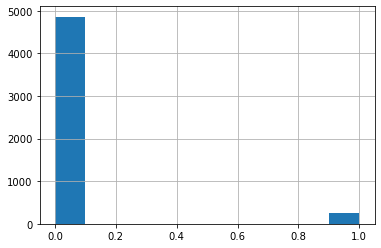

In [909]:
data['stroke'].hist()

In [910]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [911]:
#filling missing value with mean value
data.fillna(data.mean(),inplace=True)

In [912]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# convert string into numeric


In [913]:
print("Yes in ever_married:",data['ever_married'].value_counts()['Yes'])
print("No in ever_married:",data['ever_married'].value_counts()['No'])

Yes in ever_married: 3353
No in ever_married: 1757


In [914]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['ever_married']=le.fit_transform(data['ever_married'])
data['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [915]:
print("private in work_type:",data['work_type'].value_counts()['Private'])
print("self-employed in work_type:",data['work_type'].value_counts()['Self-employed'])
print("Govt_job in work_type:",data['work_type'].value_counts()['Govt_job'])
print("children in work_type:",data['work_type'].value_counts()['children'])
print("never_worked in work_type:",data['work_type'].value_counts()['Never_worked'])

private in work_type: 2925
self-employed in work_type: 819
Govt_job in work_type: 657
children in work_type: 687
never_worked in work_type: 22


In [916]:
data['work_type'] = le.fit_transform(data['work_type'])
data['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [917]:
print("Urban in Residence_type:",data['Residence_type'].value_counts()['Urban'])
print("Rural in Residence_type:",data['Residence_type'].value_counts()['Rural'])

Urban in Residence_type: 2596
Rural in Residence_type: 2514


In [918]:
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['Residence_type'].value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [919]:
print("Urban in Residence_type:",data['smoking_status'].value_counts()['formerly smoked'])
print("never smoked in Residence_type:",data['smoking_status'].value_counts()['never smoked'])
print("smokes in Residence_type:",data['smoking_status'].value_counts()['smokes'])
print("Unknown in Residence_type:",data['smoking_status'].value_counts()['Unknown'])

Urban in Residence_type: 885
never smoked in Residence_type: 1892
smokes in Residence_type: 789
Unknown in Residence_type: 1544


In [920]:
data['smoking_status'] = le.fit_transform(data['smoking_status'])
data['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [921]:
print("Male in gender:",data['gender'].value_counts()['Male'])
print("Female in gender:",data['gender'].value_counts()['Female'])

Male in gender: 2115
Female in gender: 2994


In [922]:
data['gender'] = le.fit_transform(data['gender'])
data['gender'].value_counts()


0    2994
1    2115
2       1
Name: gender, dtype: int64

In [923]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [924]:
data['stroke']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# corelation matrix

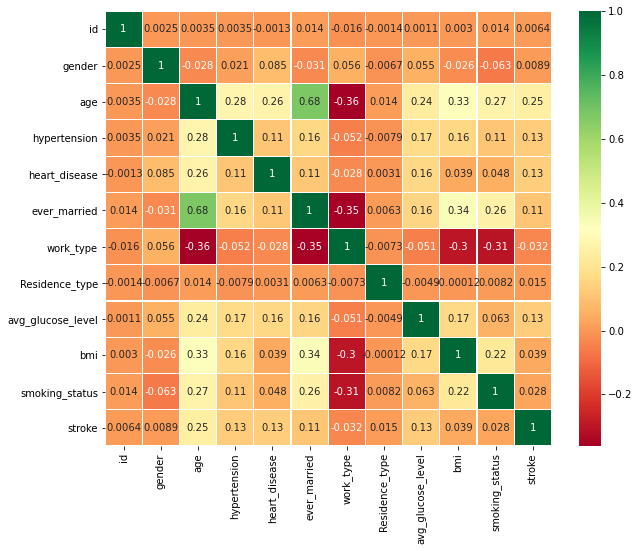

In [925]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [926]:
#drop the work_type column because it is very low corelated to the output class
data = data.drop(columns=['work_type'])
data = data.drop(columns=['id'])

# remove inrelevent data

In [927]:
data.quantile(0.99)

gender                 1.0000
age                   82.0000
hypertension           1.0000
heart_disease          1.0000
ever_married           1.0000
Residence_type         1.0000
avg_glucose_level    240.7082
bmi                   52.8910
smoking_status         3.0000
stroke                 1.0000
Name: 0.99, dtype: float64

In [928]:
#remove inrelevent data

data = data[data['gender']<=1].copy()
data = data[data['age']<=82].copy()
data = data[data['hypertension']<=1].copy()
data = data[data['heart_disease']<=1].copy()
data = data[data['ever_married']<=1].copy()
# data = data[data['work_type']<=4].copy()
data = data[data['Residence_type']<=1].copy()
data = data[data['avg_glucose_level']<=240.7082].copy()
data = data[data['bmi']<=52.8910].copy()
data = data[data['smoking_status']<=3].copy()

data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,0,166.29,25.600000,1,0


In [929]:
data.quantile(0.10)

gender                0.000
age                  10.000
hypertension          0.000
heart_disease         0.000
ever_married          0.000
Residence_type        0.000
avg_glucose_level    65.684
bmi                  19.800
smoking_status        0.000
stroke                0.000
Name: 0.1, dtype: float64

In [930]:
# data = data[data['gender']>=0].copy()
# data = data[data['age']>=3.316625].copy()
# data = data[data['hypertension']>=0].copy()
# data = data[data['heart_disease']>=0].copy()
# data = data[data['ever_married']>=0].copy()
# # data = data[data['work_type']<=4].copy()
# data = data[data['Residence_type']>=0].copy()
# data = data[data['avg_glucose_level']>=65.684000].copy()
# data = data[data['bmi']>=19.800000].copy()
# data = data[data['smoking_status']>=0].copy()

In [931]:
import scipy.stats as ss
normfit = ss.norm.fit(data['age'])
print(normfit)

(42.99260739260739, 22.658773886965832)


gender
0.34424968966192865


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


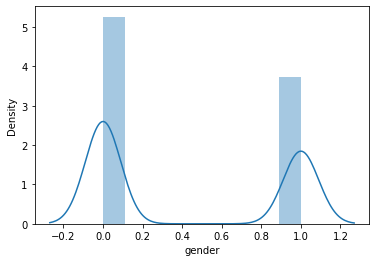

age
-0.1253434677372011


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


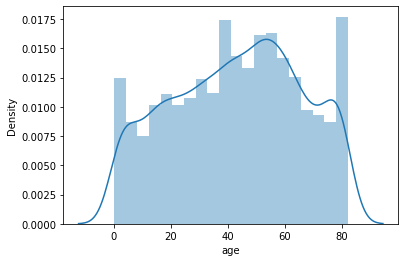

hypertension
2.784344543776817


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


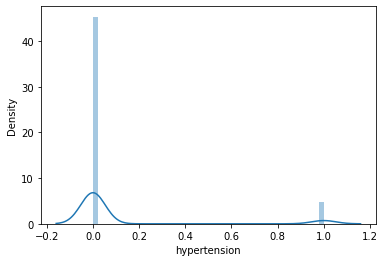

heart_disease
3.983957763193926


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


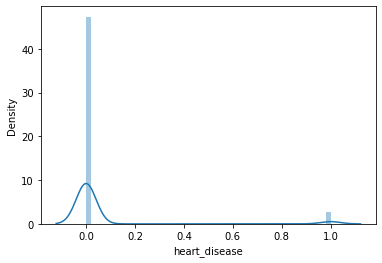

ever_married
-0.6370405856172736


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


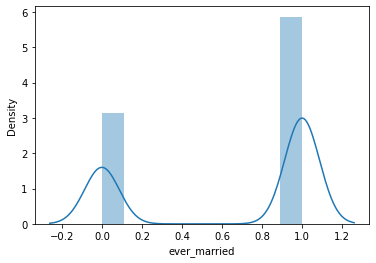

Residence_type
-0.031572364806086994


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


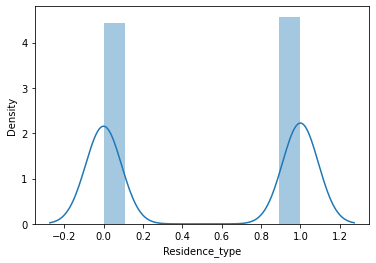

avg_glucose_level
1.566456006161665


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


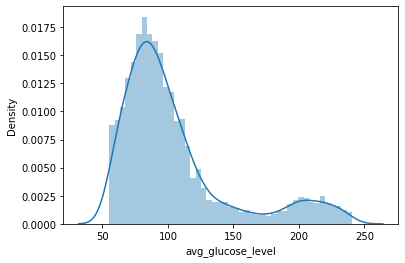

bmi
0.4996669280394438


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


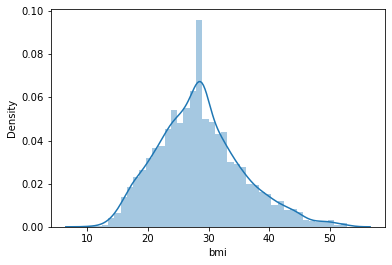

smoking_status
-0.032350016260700935


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


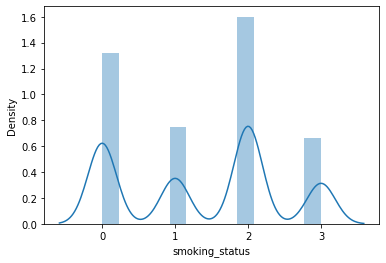

stroke
4.241647023012509


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


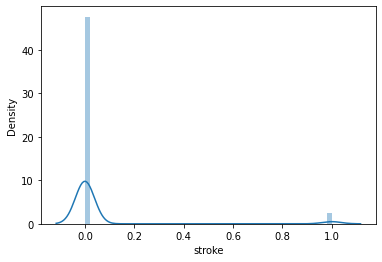

In [932]:
from scipy.stats import skew
for col in data:
    print(col)
    print(skew(data[col]))
    plt.figure()
    sns.distplot(data[col])
    plt.show()

In [933]:
import numpy as np
data['age'] = np.sqrt(data['age'])

In [934]:
skew(data['age'])

-0.77233193334919

C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

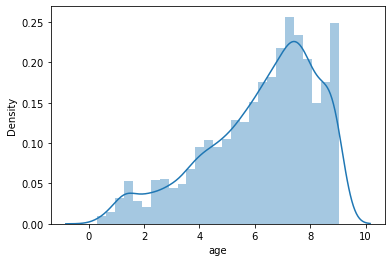

In [935]:
sns.distplot(data['age'])

In [936]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,8.185353,0,1,1,1,228.69,36.600000,1,1
1,0,7.810250,0,0,1,0,202.21,28.893237,2,1
2,1,8.944272,0,1,1,0,105.92,32.500000,2,1
3,0,7.000000,0,0,1,1,171.23,34.400000,3,1
4,0,8.888194,1,0,1,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,8.944272,1,0,1,1,83.75,28.893237,2,0
5106,0,9.000000,0,0,1,1,125.20,40.000000,2,0
5107,0,5.916080,0,0,1,0,82.99,30.600000,2,0
5108,1,7.141428,0,0,1,0,166.29,25.600000,1,0


In [937]:
y = data['stroke']
data = data.drop(columns=['stroke'])
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,8.185353,0,1,1,1,228.69,36.600000,1
1,0,7.810250,0,0,1,0,202.21,28.893237,2
2,1,8.944272,0,1,1,0,105.92,32.500000,2
3,0,7.000000,0,0,1,1,171.23,34.400000,3
4,0,8.888194,1,0,1,0,174.12,24.000000,2


In [938]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

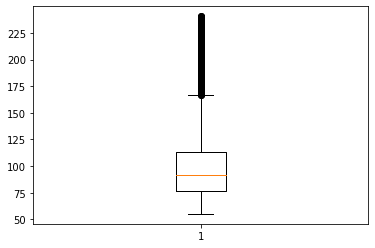

In [939]:
plt.boxplot(data['avg_glucose_level'])
plt.show()

In [940]:
# import numpy as np
# import pandas as pd

# # Generate sample data
# datas = data['avg_glucose_level']
# datas

# mini = datas.min()
# q1 = datas.quantile(0.25)
# q2 = datas.median()
# q3 = datas.quantile(0.75)

# iqr = q3 - q1

# lower_bound = q1-(1.5*iqr)
# upper_bound = q3+(1.5*iqr)
# data['avg_glucose_level']  = datas[(datas >= lower_bound) & (datas <= upper_bound)]


# data['avg_glucose_level']=data['avg_glucose_level'].fillna(data['avg_glucose_level'].mean())
# data['avg_glucose_level'].isnull().sum()

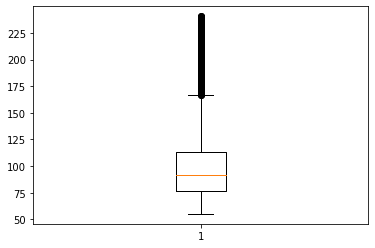

In [941]:
plt.boxplot(data['avg_glucose_level'])
plt.show()

array([[<AxesSubplot:title={'center':'stroke'}>]], dtype=object)

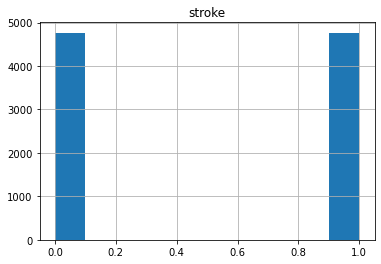

In [942]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

x_res , y_res = sm.fit_resample(data,y)
x_res = pd.DataFrame(x_res)
y_res = pd.DataFrame(y_res)

y_res.hist()

In [943]:
# import matplotlib.pyplot as plt
# plt.boxplot(data['id'])
# plt.show()

In [944]:
# import numpy as np
# import pandas as pd

# # Generate sample data
# datas = data['age']
# datas

# mini = datas.min()
# q1 = datas.quantile(0.25)
# q2 = datas.median()
# q3 = datas.quantile(0.75)

# iqr = q3 - q1

# lower_bound = q1-(1.5*iqr)
# upper_bound = q3+(1.5*iqr)
# data['age']  = datas[(datas >= lower_bound) & (datas <= upper_bound)]


# data['age']=data['age'].fillna(data['age'].mean())
# data['age'].isnull().sum()

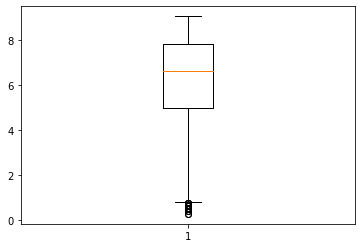

In [945]:
plt.boxplot(data['age'])
plt.show()

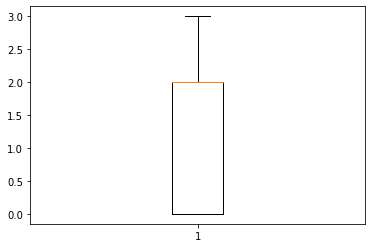

In [946]:
plt.boxplot(data['smoking_status'])
plt.show()

In [947]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,8.185353,0,1,1,1,228.69,36.600000,1
1,0,7.810250,0,0,1,0,202.21,28.893237,2
2,1,8.944272,0,1,1,0,105.92,32.500000,2
3,0,7.000000,0,0,1,1,171.23,34.400000,3
4,0,8.888194,1,0,1,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...
5105,0,8.944272,1,0,1,1,83.75,28.893237,2
5106,0,9.000000,0,0,1,1,125.20,40.000000,2
5107,0,5.916080,0,0,1,0,82.99,30.600000,2
5108,1,7.141428,0,0,1,0,166.29,25.600000,1


In [948]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.24,random_state=111)

In [949]:
x_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
556,0,4.795832,0,0,0,1,74.460000,35.600000,1
8032,0,8.905545,0,0,1,0,79.976833,29.588793,1
2348,1,7.280110,0,0,1,0,86.000000,24.100000,2
6093,0,7.587031,0,0,1,1,181.692690,27.887784,1
2333,1,5.916080,0,0,1,0,69.220000,42.800000,2
...,...,...,...,...,...,...,...,...,...
1286,0,8.774964,1,0,1,1,71.700000,32.800000,2
2802,1,8.660254,0,0,1,0,82.350000,25.300000,2
5014,0,8.306345,0,0,1,1,198.553368,28.499682,1
3183,0,3.872983,0,0,0,1,113.570000,27.500000,1


In [950]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [951]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(x_train,y_train)
neigh.score(x_test,y_test)

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8238636363636364

In [952]:
from sklearn.tree import DecisionTreeClassifier as DT
DTmodel = DT(max_depth=30)
DTmodel.fit(x_train, y_train)
DTmodel.score(x_test,y_test)

0.9270104895104895

In [953]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =46)

rf.fit(x_train,y_train)
rf.score(x_test,y_test)

<ipython-input-953-ade94a0c5f5e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9361888111888111

In [954]:
from xgboost import XGBClassifier
# fit model no training data

model = XGBClassifier(n_estimators=61)
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.9619755244755245

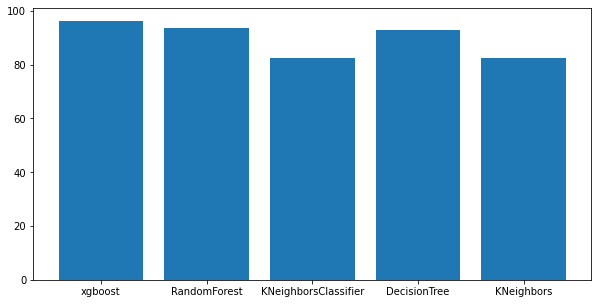

In [961]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
models = ['xgboost','RandomForest','KNeighborsClassifier','DecisionTree','KNeighbors']
score = [model.score(x_test,y_test)*100,rf.score(x_test,y_test)*100,neigh.score(x_test,y_test)*100,DTmodel.score(x_test,y_test)*100,neigh.score(x_test,y_test)*100]
#print(score)
plt.bar(models,score)
plt.show()

In [955]:
model.predict(np.array(li))

array([0])

In [956]:
x_test[2]

array([1.        , 0.79763275, 0.        , 0.        , 1.        ,
       0.        , 0.16605184, 0.32470588, 0.66666667])

In [957]:
import pickle
import numpy as np
filename = 'brain_stroke.sav'
pickle.dump(model, open(filename, 'wb'))

In [958]:
import pickle
import numpy as np
filename = 'normalized_brain_stroke.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [959]:
import pickle

'''filename = 'brain_stroke.sav'
loaded_model = pickle.load(open(filename, 'rb'))

filename1 = 'normalized_brain_stroke.sav'
loaded_model2 = pickle.load(open(filename1, 'rb'))'''

li = [[0,8.905545,0,0,1,0,79.976833,29.588793,1]]
temp = scaler.transform(np.array(li))
result = int(model.predict(temp)[0])
print(result)

1


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
